# Enrichment of regulons from Regulons_by_strain

In [38]:
import os
import sys
from importlib import reload

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0,module_path)
    
import warnings

import pandas as pd
from IPython.display import display
pd.set_option('max_colwidth', 70)
pd.set_option('display.max_rows', 500)
import string
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'figure.max_open_warning': 0})
from skimage.color import rgb2gray, rgba2rgb,gray2rgba

from orangecontrib.bioinformatics.geneset.__init__ import list_all

import jupyter_functions as jf
reload(jf)
import jupyter_functions as jf
from functionsDENet import loadPickle, savePickle
import stages_DE.enrichment_library as enr
reload(enr)
import stages_DE.enrichment_library as enr

In [39]:
#Path for expression data (mergedGenes_RPKUM.tsv)
dataPath='/home/karin/Documents/timeTrajectories/data/RPKUM/combined/'
#Path for regulons
pathRegulons='/home/karin/Documents/timeTrajectories/data/regulons/by_strain/kN300_mean0std1_log/'

## Used gene sets
Use gene sets that do not have less than 5 or more than 500 genes. Use all ontologies.

In [40]:
# Reference genes
# For conversion of gene names to EID
genes = pd.read_csv(dataPath + 'mergedGenes_RPKUM.tsv', sep='\t', index_col=0)
all_gene_names= genes[(genes != 0).any(axis=1)].index
NAME_EID=enr.name_genes_entrez(gene_names=all_gene_names, key_entrez=False)
ALL_GENE_NAMES_EID=enr.convert_EID(genes=all_gene_names, name_EID=NAME_EID)

In [41]:
# Get all gene sets
gene_sets=list(list_all(organism='44689'))
GENE_SETS_ONTOLOGY=enr.get_gene_sets(gene_set_names=gene_sets, go_slims=True,set_sizes=(5,500),
                                     reference=ALL_GENE_NAMES_EID)

In [42]:
# Find out max/min gene set sizes and N sets
max_n=0
min_n=np.inf
for k,v in GENE_SETS_ONTOLOGY.items():
    for s in v:
        n=len(s.genes & ALL_GENE_NAMES_EID)
        if n<min_n:
            min_n=n
        if n>max_n:
            max_n=n
print('Min size',min_n,'Max size',max_n)  
print('N sets',{k:len(v) for k,v in GENE_SETS_ONTOLOGY.items()})

Min size 5 Max size 495
N sets {('GO', 'molecular_function'): 35, ('GO', 'cellular_component'): 24, ('Custom', 'Baylor'): 15, ('Dictybase', 'Phenotypes'): 207, ('KEGG', 'Pathways'): 95, ('GO', 'biological_process'): 52}


## Enrichment reports

Enrichment bar plot: Query - information about the gene group of interest, Reference -information about the reference gene group. Both Query and Reference are written as "p (N)", where p is the proportion of group genes used for enrichemnt analysis that overlap with the gene set, given as percent, and N is the number of such genes. Fold enrichment is given as bars, with consistent scale across gene groups (regulons) - min = 1 and max = 100 (all individual fold enrichments are < 100). The bars are coloured based on FDR so that the colour shows -log10(FDR) with all FDRs <= 10^-10 being coloured the same (yellow). The largest FDR (0.25) is coloured violet.

Enrichment map: Circles show gene sets (as displayed in the report). Size shows the overlap between gene set and query (genes of interest) as ratio of query genes used in enrichemnt calculation (larger is more). Colour denotes padj value (smaller is more yellow), with all values below 10^-10 being assigned the same shade of yellow. Lines show overlap between gene sets as ration of genes from smaller gene set present in the larger one, encoded as line thickness. Overlaps below 0.1 were excludded from plotting. Arrows show that all genes of a samller gene set (arrow start) are contained in the larger gene set. 

In [43]:
save_enrichment=False
PADJ=0.25
MIN_OVERLAP=2
MAX_FE_BAR=None
MIN_FDR_BAR=10**(-10)
LFDR_BASE_BAR=10
# Any colour map from https://matplotlib.org/tutorials/colors/colormaps.html
#CMAP_FDR_BAR='gnuplot'
#CMAP_FDR_BAR=['#000000',"#171082", "#6d00b0",'#a1239f', "#b0003e",'#b01a00','#cc6300','#eb9202','#d4a600','#e3dc12']
CMAP_FDR_BAR=['#bede57','#5fb526','#36801d','#015713','#000803']

Using only genes annotated with at least one gene set¶

To find genes that have gene set annotations only gene sets used in enrichment are used (see above). Genes that are in at least one of these gene sets are used for enrichment calculation, both for reference and gene group of interest (query).


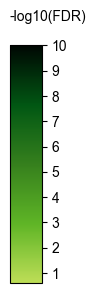

In [44]:
#Colour fold change legend
%matplotlib agg
fig,ax=enr.plot_legend_enrichment_bar(cmap=CMAP_FDR_BAR, min_FDR=MIN_FDR_BAR,used_padj=PADJ,base=LFDR_BASE_BAR)
display(fig)

# In grayscale
#cmap= matplotlib.colors.LinearSegmentedColormap.from_list("", CMAP_FDR_BAR)
#cmap_gray = gray2rgba(rgb2gray(rgba2rgb(cmap(np.linspace(0, 1, 256)).reshape(1,256,4)))).reshape(256,4).tolist()
#fig,ax=enr.plot_legend_enrichment_bar(cmap=cmap_gray, min_FDR=MIN_FDR_BAR,used_padj=PADJ,base=LFDR_BASE_BAR)
#display(fig)

### All based

#### Resolution 0.4
File: expression_minExpressed0.990.1Strains1Min1Max18_clustersLouvain0.4minmaxNologPCA30kN30.pdf

***  C1 selected: 30 with EID: 30
Genes annotated with a gene set in reference 37.8% and group 73.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 20 out of 22 group genes used for enrichment calculation.


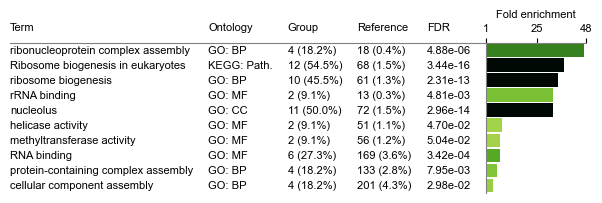

***  C2 selected: 66 with EID: 65
Genes annotated with a gene set in reference 37.8% and group 63.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 34 out of 41 group genes used for enrichment calculation.


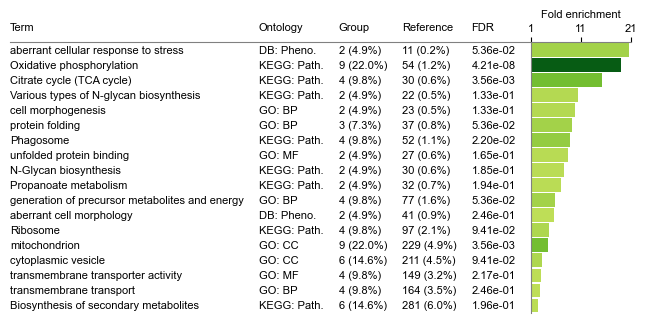

***  C3 selected: 68 with EID: 68
Genes annotated with a gene set in reference 37.8% and group 97.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 62 out of 66 group genes used for enrichment calculation.


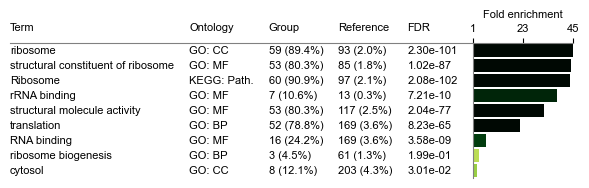

***  C4 selected: 55 with EID: 55
Genes annotated with a gene set in reference 37.8% and group 49.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 18 out of 27 group genes used for enrichment calculation.


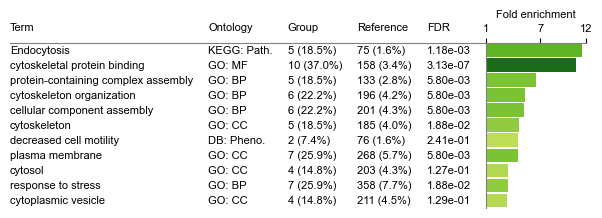

***  C5 selected: 41 with EID: 41
Genes annotated with a gene set in reference 37.8% and group 98.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 35 out of 40 group genes used for enrichment calculation.


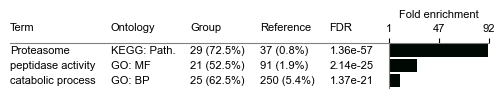

***  C6 selected: 74 with EID: 74
Genes annotated with a gene set in reference 37.8% and group 55.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 33 out of 41 group genes used for enrichment calculation.


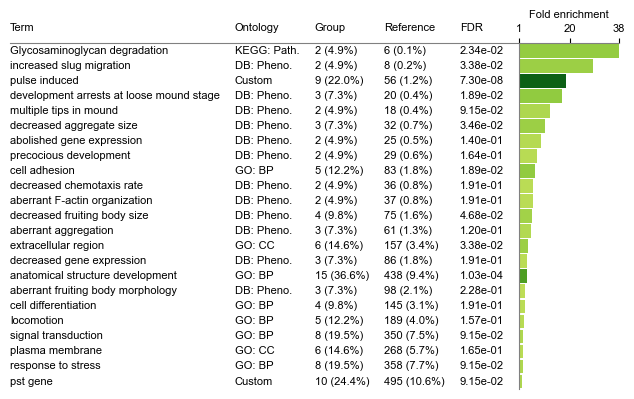

***  C7 selected: 40 with EID: 40
Genes annotated with a gene set in reference 37.8% and group 40.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 14 out of 16 group genes used for enrichment calculation.


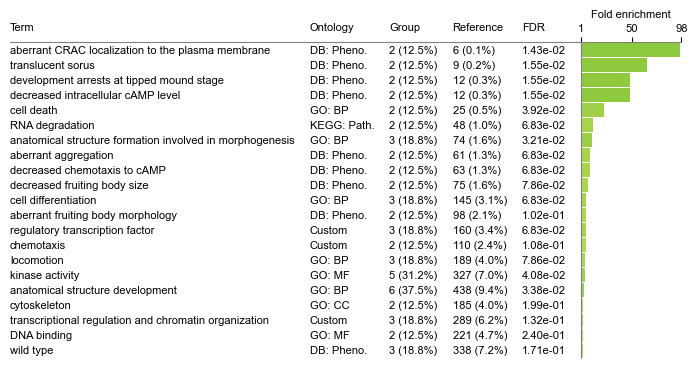

***  C8 selected: 23 with EID: 23
Genes annotated with a gene set in reference 37.8% and group 43.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 6 out of 10 group genes used for enrichment calculation.


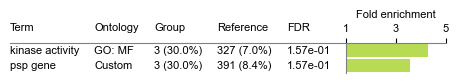

***  C9 selected: 20 with EID: 20
Genes annotated with a gene set in reference 37.8% and group 90.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 18 out of 18 group genes used for enrichment calculation.


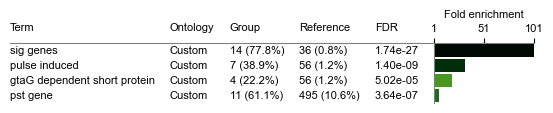

***  C10 selected: 36 with EID: 36
Genes annotated with a gene set in reference 37.8% and group 53.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 18 out of 19 group genes used for enrichment calculation.


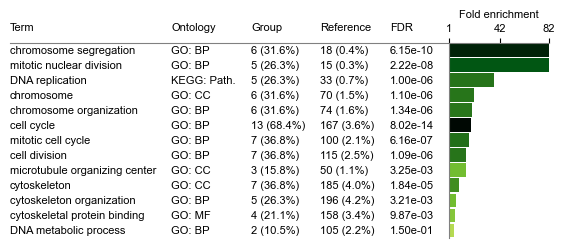

***  C11 selected: 77 with EID: 77
Genes annotated with a gene set in reference 37.8% and group 36.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 14 out of 28 group genes used for enrichment calculation.


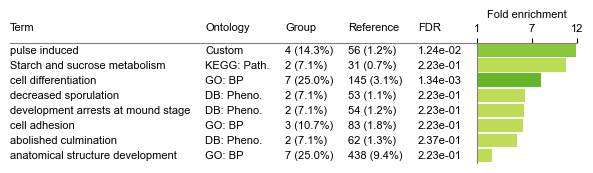

***  C12 selected: 57 with EID: 57
Genes annotated with a gene set in reference 37.8% and group 61.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 23 out of 35 group genes used for enrichment calculation.


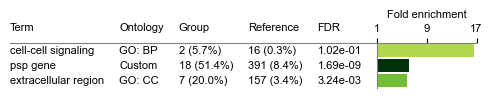

***  C13 selected: 64 with EID: 64
Genes annotated with a gene set in reference 37.8% and group 80.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 43 out of 51 group genes used for enrichment calculation.


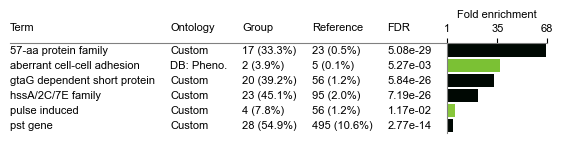

***  C14 selected: 19 with EID: 19
Genes annotated with a gene set in reference 37.8% and group 84.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 14 out of 16 group genes used for enrichment calculation.


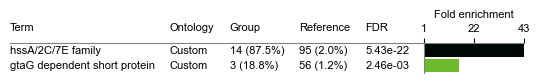

***  C15 selected: 91 with EID: 91
Genes annotated with a gene set in reference 37.8% and group 74.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 55 out of 67 group genes used for enrichment calculation.


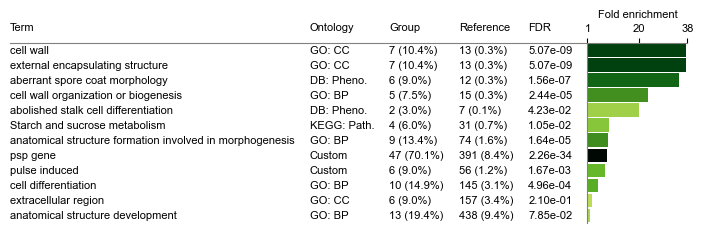

***  C16 selected: 74 with EID: 74
Genes annotated with a gene set in reference 37.8% and group 53.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 36 out of 39 group genes used for enrichment calculation.


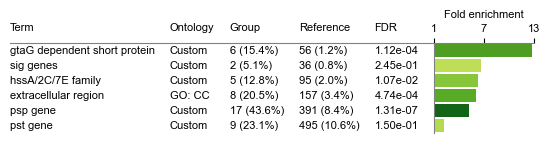

***  C17 selected: 61 with EID: 59
Genes annotated with a gene set in reference 37.8% and group 39.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 15 out of 23 group genes used for enrichment calculation.


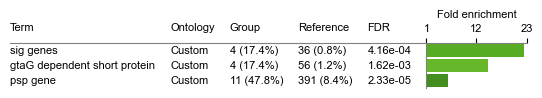

***  C18 selected: 46 with EID: 45
Genes annotated with a gene set in reference 37.8% and group 42.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 15 out of 19 group genes used for enrichment calculation.


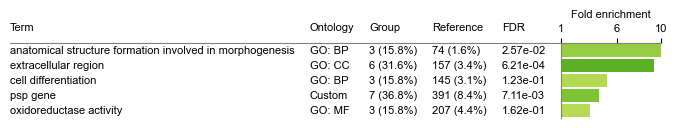

***  C19 selected: 58 with EID: 58
Genes annotated with a gene set in reference 37.8% and group 31.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 17 out of 18 group genes used for enrichment calculation.


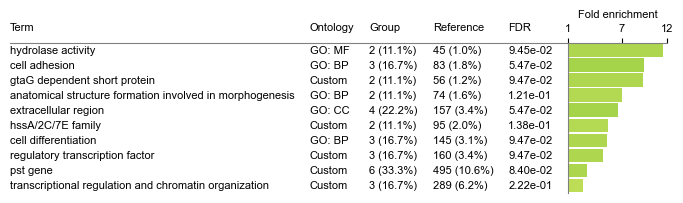

***  C20 selected: 54 with EID: 54
Genes annotated with a gene set in reference 37.8% and group 37.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 7 out of 20 group genes used for enrichment calculation.


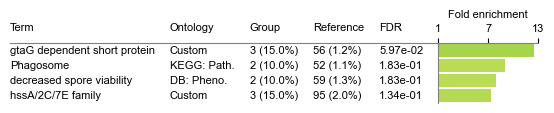

***  C21 selected: 45 with EID: 45
Genes annotated with a gene set in reference 37.8% and group 27.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 8 out of 12 group genes used for enrichment calculation.


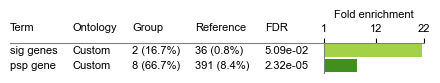

In [45]:
%matplotlib agg
regulons=pd.read_table(pathRegulons+'mergedGenes_minExpressed0.990.1Strains1Min1Max18_clustersLouvain0.4minmaxNologPCA30kN30.tab',index_col=0)
figs=[]
for group in range(1,len(regulons['Cluster'].unique())+1):
#for group in [1,2]:
    enriched=enr.group_diff_enrichment(query_names=list(regulons.query('Cluster =="'+'C'+str(group)+'"').index),
                                       group='C'+str(group),
                                       name_eid=NAME_EID,all_gene_names_eid=ALL_GENE_NAMES_EID, 
                                       gene_sets_ontology=GENE_SETS_ONTOLOGY,
                                       use_annotated_genes=True,
                                       min_overlap=MIN_OVERLAP,padj=PADJ,
                                       make_enrichment_bar=True,
                                       max_FE_bar=MAX_FE_BAR, min_FDR_bar=MIN_FDR_BAR,cmap_FDR_bar=CMAP_FDR_BAR,
                                       lFDR_base_bar=LFDR_BASE_BAR
                                      )
    figs.append(enriched[1])
    display(enriched[1][0])
    if  save_enrichment and enriched is not None:
        enriched[0].to_csv(pathRegulons+'enrichment/minExpressed0.990.1Strains1Min1Max18_clustersLouvain0.4minmaxNologPCA30kN30_annotatedOnly_enrichment_cluster'+str(group)+'.tsv', sep='\t',index=False)
plt.close('all')    

#### Resolution 0.3
File: expression_minExpressed0.990.1Strains1Min1Max18_clustersLouvain0.3minmaxNologPCA30kN30.pdf

***  C1 selected: 30 with EID: 30
Genes annotated with a gene set in reference 37.8% and group 73.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 20 out of 22 group genes used for enrichment calculation.


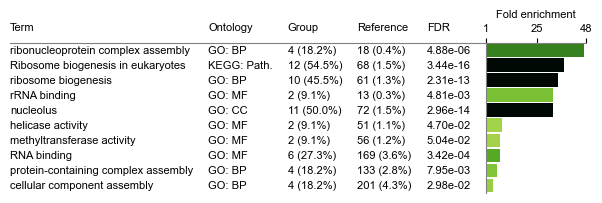

***  C2 selected: 41 with EID: 41
Genes annotated with a gene set in reference 37.8% and group 98.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 35 out of 40 group genes used for enrichment calculation.


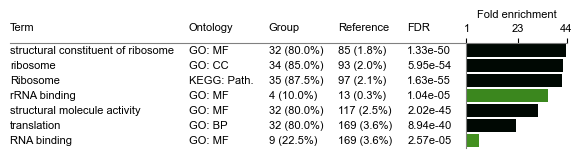

***  C3 selected: 69 with EID: 68
Genes annotated with a gene set in reference 37.8% and group 65.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 36 out of 44 group genes used for enrichment calculation.


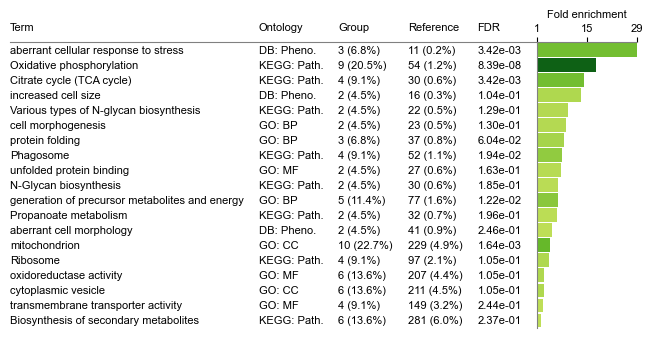

***  C4 selected: 42 with EID: 42
Genes annotated with a gene set in reference 37.8% and group 50.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 17 out of 21 group genes used for enrichment calculation.


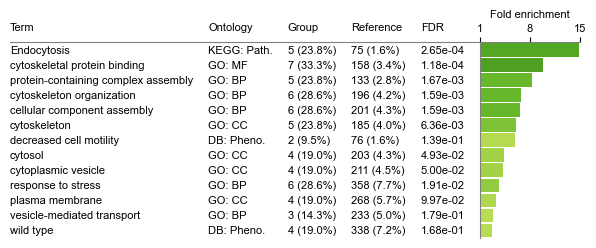

***  C5 selected: 27 with EID: 27
Genes annotated with a gene set in reference 37.8% and group 96.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 26 out of 26 group genes used for enrichment calculation.


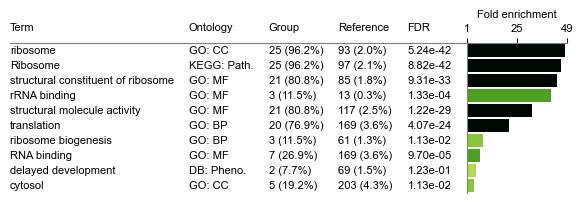

***  C6 selected: 41 with EID: 41
Genes annotated with a gene set in reference 37.8% and group 98.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 35 out of 40 group genes used for enrichment calculation.


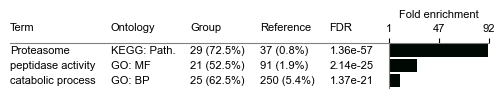

***  C7 selected: 67 with EID: 67
Genes annotated with a gene set in reference 37.8% and group 57.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 32 out of 38 group genes used for enrichment calculation.


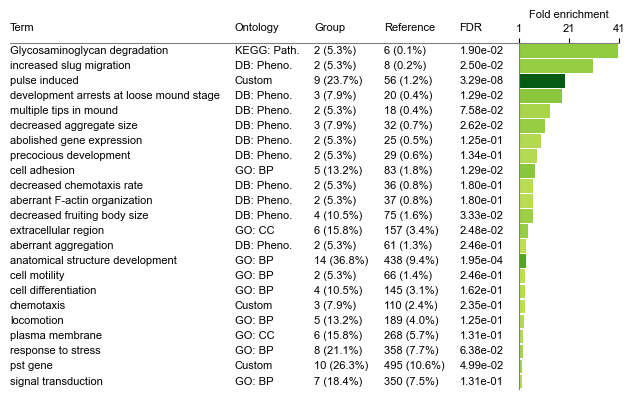

***  C8 selected: 39 with EID: 39
Genes annotated with a gene set in reference 37.8% and group 41.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 14 out of 16 group genes used for enrichment calculation.


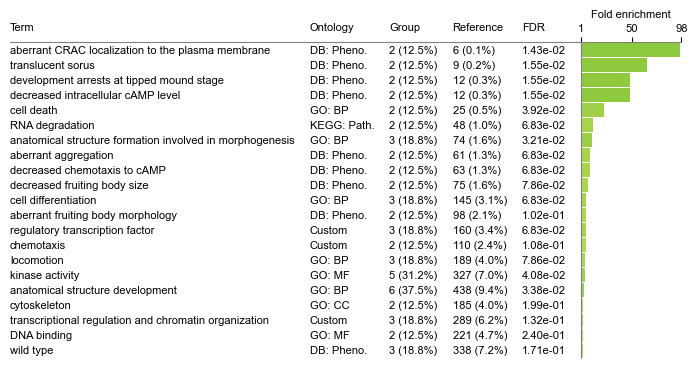

***  C9 selected: 22 with EID: 22
Genes annotated with a gene set in reference 37.8% and group 41.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 3 out of 9 group genes used for enrichment calculation.


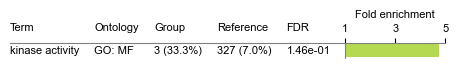

***  C10 selected: 36 with EID: 36
Genes annotated with a gene set in reference 37.8% and group 53.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 18 out of 19 group genes used for enrichment calculation.


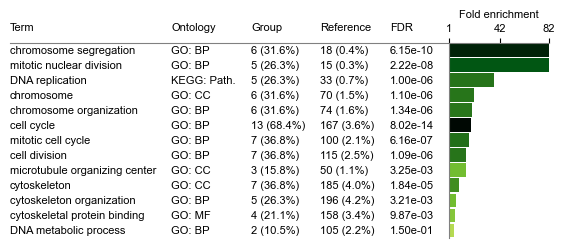

***  C11 selected: 22 with EID: 22
Genes annotated with a gene set in reference 37.8% and group 86.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 19 out of 19 group genes used for enrichment calculation.


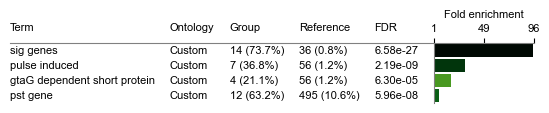

***  C12 selected: 21 with EID: 21
Genes annotated with a gene set in reference 37.8% and group 43.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 9 out of 9 group genes used for enrichment calculation.


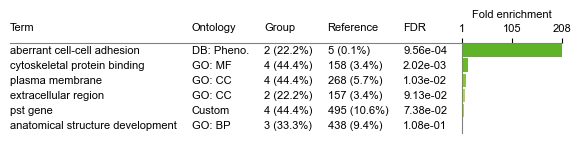

***  C13 selected: 58 with EID: 58
Genes annotated with a gene set in reference 37.8% and group 41.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 12 out of 24 group genes used for enrichment calculation.


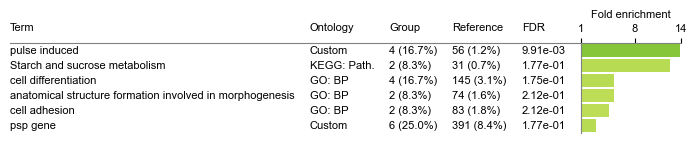

***  C14 selected: 35 with EID: 35
Genes annotated with a gene set in reference 37.8% and group 37.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 9 out of 13 group genes used for enrichment calculation.


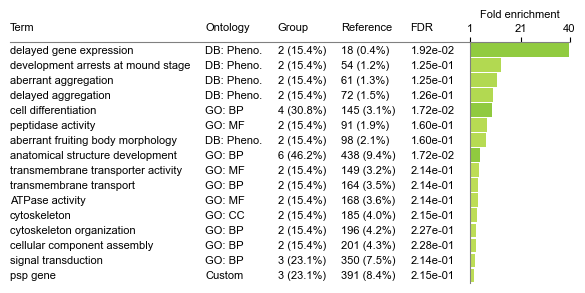

***  C15 selected: 57 with EID: 57
Genes annotated with a gene set in reference 37.8% and group 84.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 40 out of 48 group genes used for enrichment calculation.


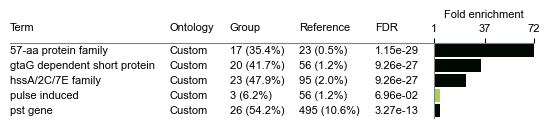

***  C16 selected: 51 with EID: 51
Genes annotated with a gene set in reference 37.8% and group 73.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 30 out of 37 group genes used for enrichment calculation.


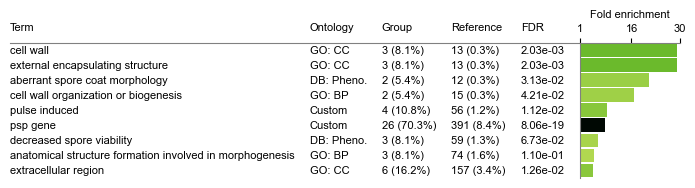

***  C17 selected: 19 with EID: 19
Genes annotated with a gene set in reference 37.8% and group 84.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 14 out of 16 group genes used for enrichment calculation.


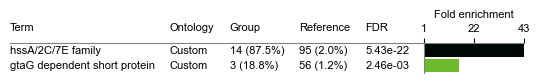

***  C18 selected: 68 with EID: 68
Genes annotated with a gene set in reference 37.8% and group 75.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 39 out of 51 group genes used for enrichment calculation.


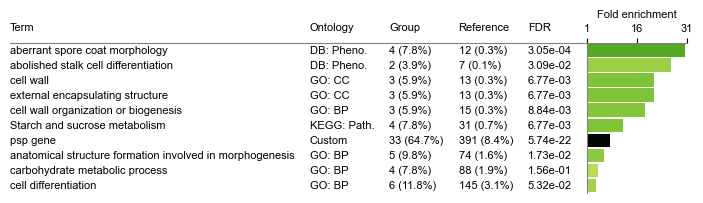

***  C19 selected: 23 with EID: 23
Genes annotated with a gene set in reference 37.8% and group 35.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 6 out of 8 group genes used for enrichment calculation.


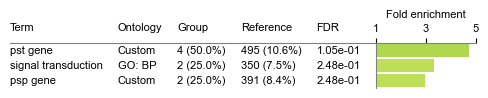

***  C20 selected: 69 with EID: 69
Genes annotated with a gene set in reference 37.8% and group 51.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 34 out of 35 group genes used for enrichment calculation.


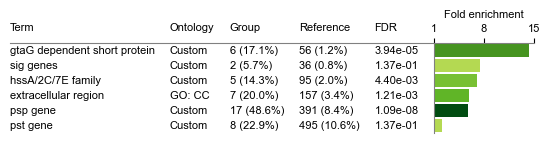

***  C21 selected: 63 with EID: 61
Genes annotated with a gene set in reference 37.8% and group 41.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 15 out of 25 group genes used for enrichment calculation.


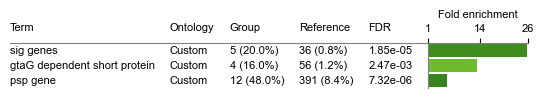

***  C22 selected: 71 with EID: 70
Genes annotated with a gene set in reference 37.8% and group 41.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 17 out of 29 group genes used for enrichment calculation.


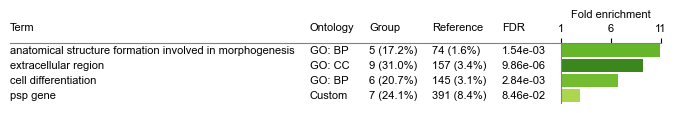

***  C23 selected: 57 with EID: 57
Genes annotated with a gene set in reference 37.8% and group 37.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 8 out of 21 group genes used for enrichment calculation.


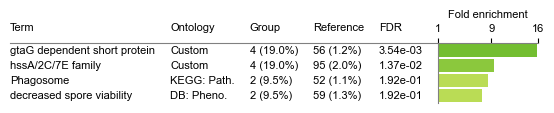

***  C24 selected: 43 with EID: 43
Genes annotated with a gene set in reference 37.8% and group 26.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 7 out of 11 group genes used for enrichment calculation.


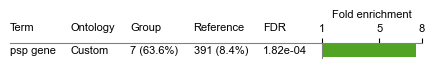

***  C25 selected: 28 with EID: 28
Genes annotated with a gene set in reference 37.8% and group 25.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 5 out of 7 group genes used for enrichment calculation.


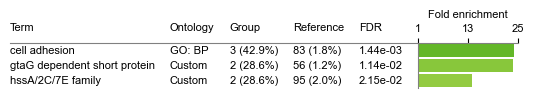

In [46]:
%matplotlib agg
regulons=pd.read_table(pathRegulons+'mergedGenes_minExpressed0.990.1Strains1Min1Max18_clustersLouvain0.3minmaxNologPCA30kN30.tab',index_col=0)
figs=[]
for group in range(1,len(regulons['Cluster'].unique())+1):
#for group in [1,2]:
    enriched=enr.group_diff_enrichment(query_names=list(regulons.query('Cluster =="'+'C'+str(group)+'"').index),
                                       group='C'+str(group),
                                       name_eid=NAME_EID,all_gene_names_eid=ALL_GENE_NAMES_EID, 
                                       gene_sets_ontology=GENE_SETS_ONTOLOGY,
                                       use_annotated_genes=True,
                                       min_overlap=MIN_OVERLAP,padj=PADJ,
                                       make_enrichment_bar=True,
                                       max_FE_bar=MAX_FE_BAR, min_FDR_bar=MIN_FDR_BAR,cmap_FDR_bar=CMAP_FDR_BAR,
                                       lFDR_base_bar=LFDR_BASE_BAR
                                      )
    figs.append(enriched[1])
    display(enriched[1][0])
    if  save_enrichment and enriched is not None:
        enriched[0].to_csv(pathRegulons+'enrichment/minExpressed0.990.1Strains1Min1Max18_clustersLouvain0.3minmaxNologPCA30kN30_annotatedOnly_enrichment_cluster'+str(group)+'.tsv', sep='\t',index=False)
plt.close('all')   

### AX4 based

#### Resolution 0.4
File: mergedGenes_minExpressed0.990.1Strains1Min1Max18_clustersAX4Louvain0.4m0s1log.tab

*** Cluster C1 (A)
***  C1 selected: 31 with EID: 31
Genes annotated with a gene set in reference 37.8% and group 74.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 20 out of 23 group genes used for enrichment calculation.


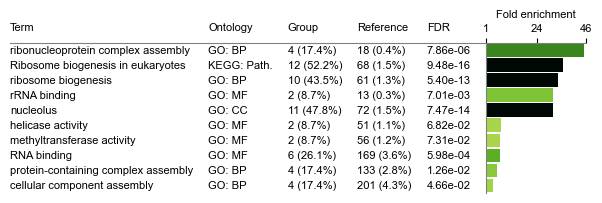

*** Cluster C2 (B)
***  C2 selected: 54 with EID: 54
Genes annotated with a gene set in reference 37.8% and group 65.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 24 out of 35 group genes used for enrichment calculation.


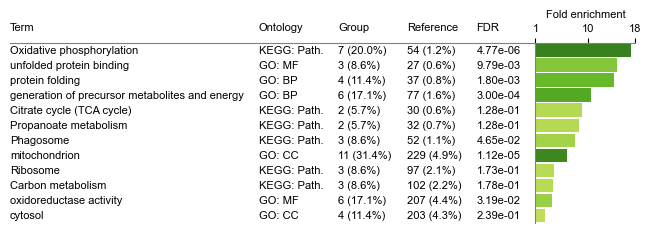

*** Cluster C3 (C)
***  C3 selected: 54 with EID: 54
Genes annotated with a gene set in reference 37.8% and group 89.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 44 out of 48 group genes used for enrichment calculation.


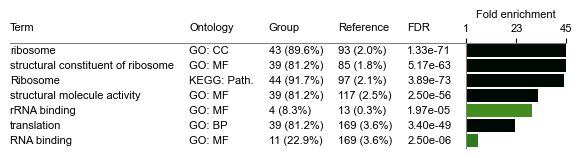

*** Cluster C4 (D)
***  C4 selected: 43 with EID: 43
Genes annotated with a gene set in reference 37.8% and group 56.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 20 out of 24 group genes used for enrichment calculation.


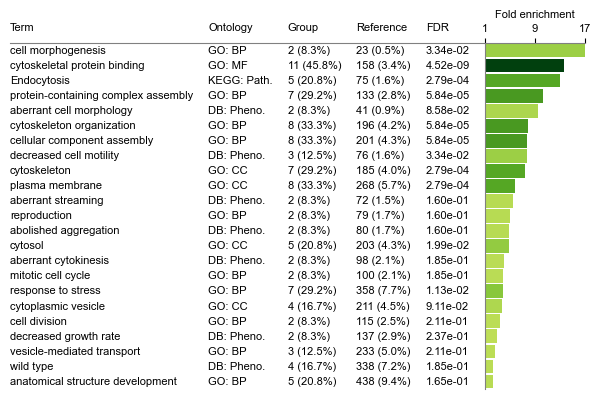

*** Cluster C5 (E)
***  C5 selected: 20 with EID: 20
Genes annotated with a gene set in reference 37.8% and group 90.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 18 out of 18 group genes used for enrichment calculation.


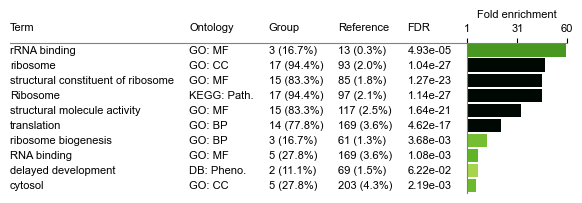

*** Cluster C6 (F)
***  C6 selected: 49 with EID: 49
Genes annotated with a gene set in reference 37.8% and group 94.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 35 out of 46 group genes used for enrichment calculation.


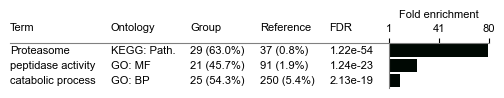

*** Cluster C7 (G)
***  C7 selected: 96 with EID: 96
Genes annotated with a gene set in reference 37.8% and group 51.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 40 out of 49 group genes used for enrichment calculation.


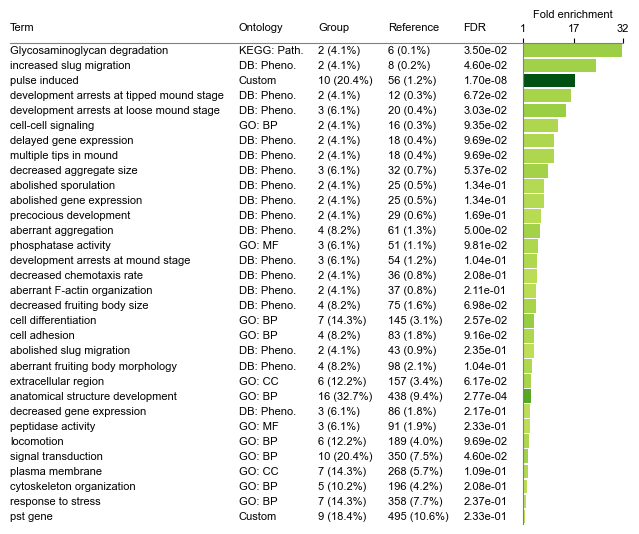

*** Cluster C8 (H)
***  C8 selected: 35 with EID: 35
Genes annotated with a gene set in reference 37.8% and group 43.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 13 out of 15 group genes used for enrichment calculation.


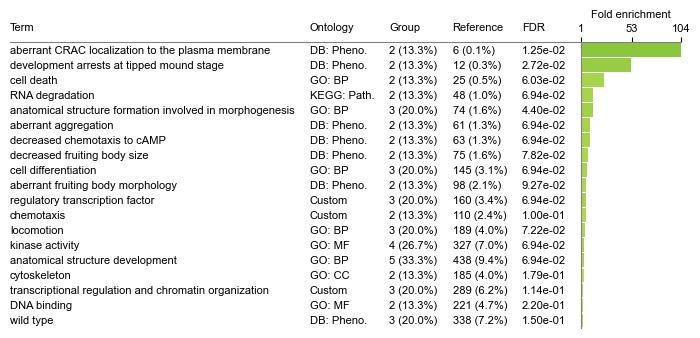

*** Cluster C9 (I)
***  C9 selected: 38 with EID: 38
Genes annotated with a gene set in reference 37.8% and group 50.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 18 out of 19 group genes used for enrichment calculation.


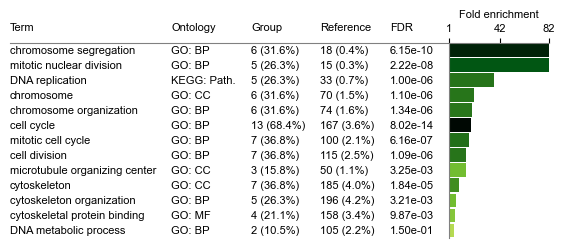

*** Cluster C10 (J)
***  C10 selected: 70 with EID: 70
Genes annotated with a gene set in reference 37.8% and group 39.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 23 out of 27 group genes used for enrichment calculation.


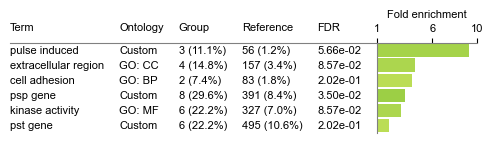

*** Cluster C11 (K)
***  C11 selected: 85 with EID: 85
Genes annotated with a gene set in reference 37.8% and group 71.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 50 out of 60 group genes used for enrichment calculation.


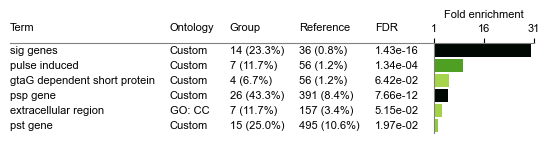

*** Cluster C12 (L)
***  C12 selected: 73 with EID: 73
Genes annotated with a gene set in reference 37.8% and group 84.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 57 out of 61 group genes used for enrichment calculation.


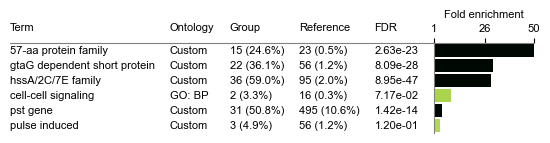

*** Cluster C13 (M)
***  C13 selected: 49 with EID: 49
Genes annotated with a gene set in reference 37.8% and group 39.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 17 out of 19 group genes used for enrichment calculation.


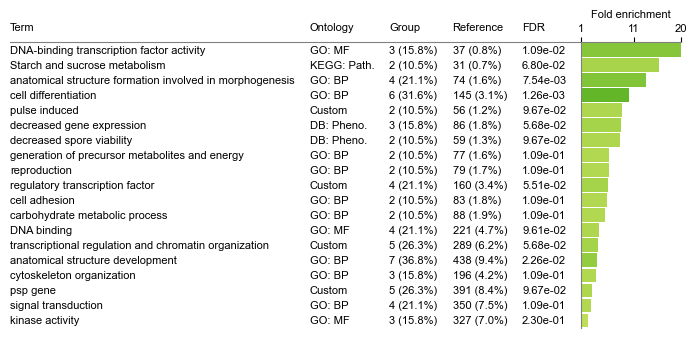

*** Cluster C14 (N)
***  C14 selected: 87 with EID: 87
Genes annotated with a gene set in reference 37.8% and group 83.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 64 out of 72 group genes used for enrichment calculation.


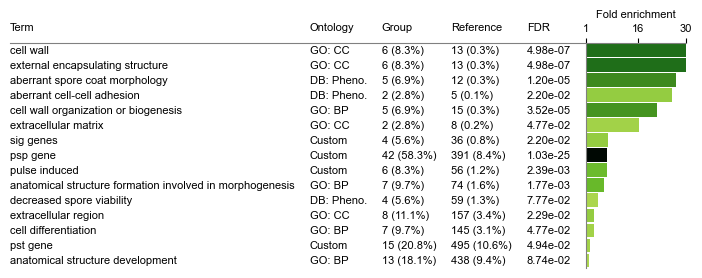

*** Cluster C15 (O)
***  C15 selected: 31 with EID: 31
Genes annotated with a gene set in reference 37.8% and group 58.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 8 out of 18 group genes used for enrichment calculation.


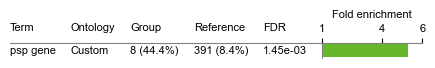

*** Cluster C16 (P)
***  C16 selected: 72 with EID: 72
Genes annotated with a gene set in reference 37.8% and group 53.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 35 out of 38 group genes used for enrichment calculation.


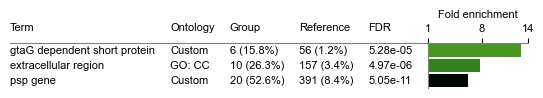

*** Cluster C17 (Q)
***  C17 selected: 57 with EID: 56
Genes annotated with a gene set in reference 37.8% and group 30.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 11 out of 17 group genes used for enrichment calculation.


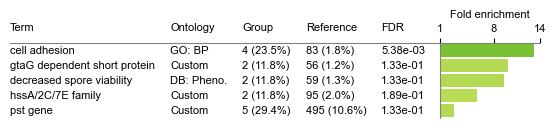

*** Cluster C18 (R)
***  C18 selected: 65 with EID: 63
Genes annotated with a gene set in reference 37.8% and group 25.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 14 out of 16 group genes used for enrichment calculation.


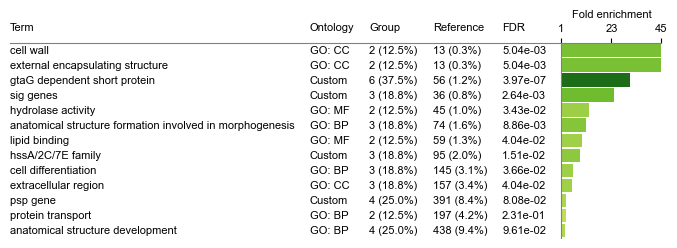

*** Cluster C19 (S)
***  C19 selected: 89 with EID: 88
Genes annotated with a gene set in reference 37.8% and group 26.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 16 out of 23 group genes used for enrichment calculation.


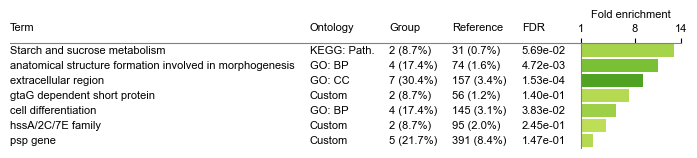

*** Cluster C20 (T)
***  C20 selected: 1 with EID: 1
Genes annotated with a gene set in reference 37.8% and group 0.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 0 out of 0 group genes used for enrichment calculation.


None

In [47]:
%matplotlib agg
regulons=pd.read_table(pathRegulons+'mergedGenes_minExpressed0.990.1Strains1Min1Max18_clustersAX4Louvain0.4m0s1log.tab',index_col=0)
figs=[]
for group in range(1,len(regulons['Cluster'].unique())+1):
#for group in [1,2]:
    cluster='C'+str(group)
    print('*** Cluster %s (%s)' %(cluster,string.ascii_uppercase[group-1]))
    enriched=enr.group_diff_enrichment(query_names=list(regulons.query('Cluster =="'+'C'+str(group)+'"').index),
                                       group=cluster,
                                       name_eid=NAME_EID,all_gene_names_eid=ALL_GENE_NAMES_EID, 
                                       gene_sets_ontology=GENE_SETS_ONTOLOGY,
                                       use_annotated_genes=True,
                                       min_overlap=MIN_OVERLAP,padj=PADJ,
                                       make_enrichment_bar=True,
                                       max_FE_bar=MAX_FE_BAR, min_FDR_bar=MIN_FDR_BAR,
                                       cmap_FDR_bar=CMAP_FDR_BAR,
                                       lFDR_base_bar=LFDR_BASE_BAR
                                      )
    figs.append(enriched[1])
    display(enriched[1][0])
    if  save_enrichment and enriched is not None:
        enriched[0].to_csv(pathRegulons+'enrichment/mergedGenes_minExpressed0.990.1Strains1Min1Max18_clustersAX4Louvain0.4m0s1log'+str(group)+'.tsv', sep='\t',index=False)
plt.close('all')    

#### Resolution 0.8
File: mergedGenes_minExpressed0.990.1Strains1Min1Max18_clustersAX4Louvain0.8m0s1log.tab

*** Cluster C1 (A)
***  C1 selected: 31 with EID: 31
Genes annotated with a gene set in reference 37.8% and group 74.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 20 out of 23 group genes used for enrichment calculation.


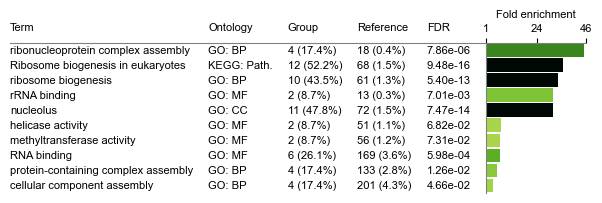

*** Cluster C2 (B)
***  C2 selected: 74 with EID: 74
Genes annotated with a gene set in reference 37.8% and group 89.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 62 out of 66 group genes used for enrichment calculation.


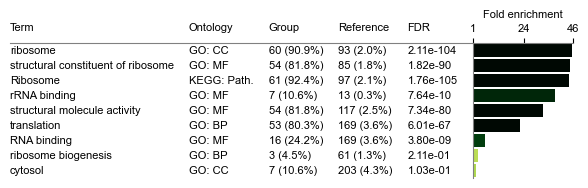

*** Cluster C3 (C)
***  C3 selected: 97 with EID: 97
Genes annotated with a gene set in reference 37.8% and group 61.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 38 out of 59 group genes used for enrichment calculation.


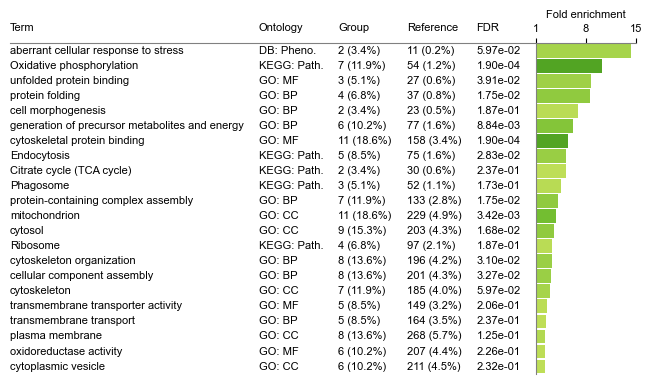

*** Cluster C4 (D)
***  C4 selected: 49 with EID: 49
Genes annotated with a gene set in reference 37.8% and group 94.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 35 out of 46 group genes used for enrichment calculation.


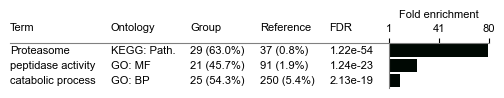

*** Cluster C5 (E)
***  C5 selected: 35 with EID: 35
Genes annotated with a gene set in reference 37.8% and group 43.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 13 out of 15 group genes used for enrichment calculation.


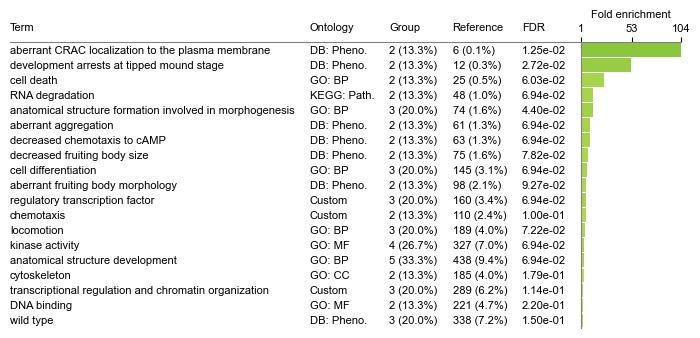

*** Cluster C6 (F)
***  C6 selected: 100 with EID: 100
Genes annotated with a gene set in reference 37.8% and group 50.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 41 out of 50 group genes used for enrichment calculation.


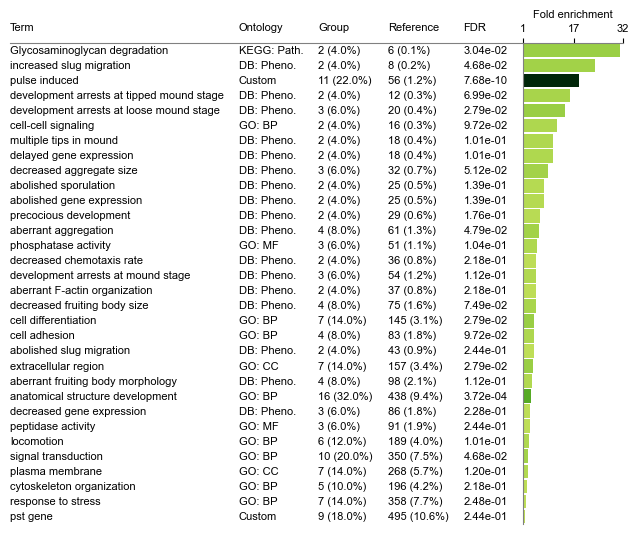

*** Cluster C7 (G)
***  C7 selected: 38 with EID: 38
Genes annotated with a gene set in reference 37.8% and group 50.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 18 out of 19 group genes used for enrichment calculation.


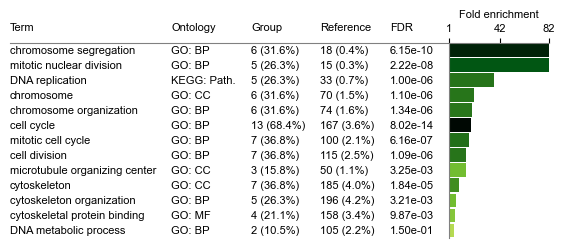

*** Cluster C8 (H)
***  C8 selected: 117 with EID: 117
Genes annotated with a gene set in reference 37.8% and group 38.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 34 out of 45 group genes used for enrichment calculation.


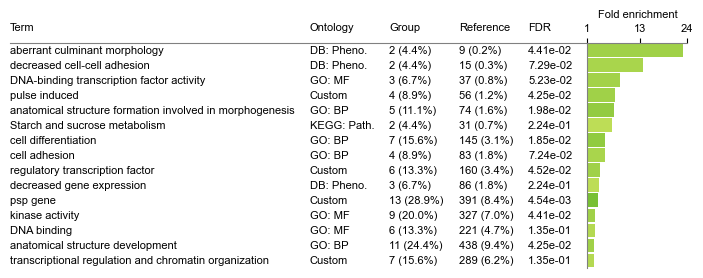

*** Cluster C9 (I)
***  C9 selected: 73 with EID: 73
Genes annotated with a gene set in reference 37.8% and group 84.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 57 out of 61 group genes used for enrichment calculation.


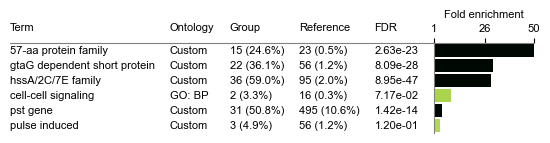

*** Cluster C10 (J)
***  C10 selected: 143 with EID: 143
Genes annotated with a gene set in reference 37.8% and group 73.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 88 out of 105 group genes used for enrichment calculation.


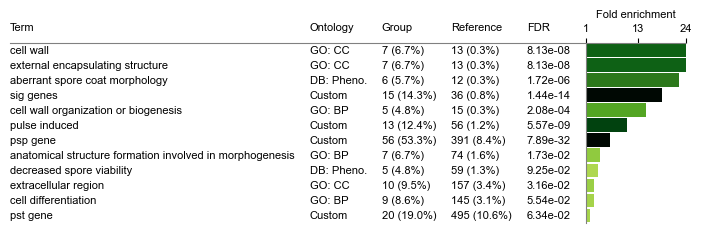

*** Cluster C11 (K)
***  C11 selected: 125 with EID: 125
Genes annotated with a gene set in reference 37.8% and group 65.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 71 out of 81 group genes used for enrichment calculation.


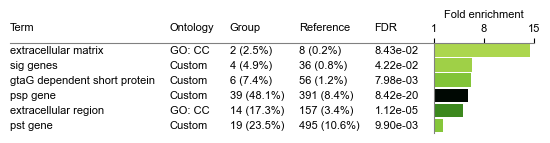

*** Cluster C12 (L)
***  C12 selected: 140 with EID: 137
Genes annotated with a gene set in reference 37.8% and group 30.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 28 out of 41 group genes used for enrichment calculation.


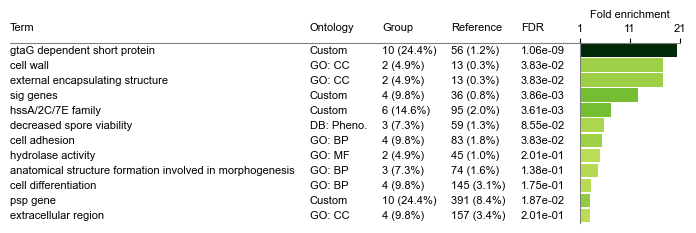

*** Cluster C13 (M)
***  C13 selected: 77 with EID: 76
Genes annotated with a gene set in reference 37.8% and group 22.0%
Enrichment at FDR: 0.25 and min group - gene set overlap 2
N group genes in displayed gene sets: 9 out of 17 group genes used for enrichment calculation.


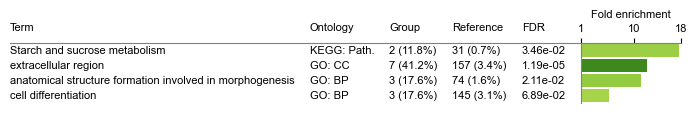

In [48]:
%matplotlib agg
regulons=pd.read_table(pathRegulons+'mergedGenes_minExpressed0.990.1Strains1Min1Max18_clustersAX4Louvain0.8m0s1log.tab',index_col=0)
figs=[]
for group in range(1,len(regulons['Cluster'].unique())+1):
#for group in [1,2]:
    cluster='C'+str(group)
    print('*** Cluster %s (%s)' %(cluster,string.ascii_uppercase[group-1]))
    enriched=enr.group_diff_enrichment(query_names=list(regulons.query('Cluster =="'+'C'+str(group)+'"').index),
                                       group=cluster,
                                       name_eid=NAME_EID,all_gene_names_eid=ALL_GENE_NAMES_EID, 
                                       gene_sets_ontology=GENE_SETS_ONTOLOGY,
                                       use_annotated_genes=True,
                                       min_overlap=MIN_OVERLAP,padj=PADJ,
                                       make_enrichment_bar=True,
                                       max_FE_bar=MAX_FE_BAR, min_FDR_bar=MIN_FDR_BAR,
                                       cmap_FDR_bar=CMAP_FDR_BAR,
                                       lFDR_base_bar=LFDR_BASE_BAR
                                      )
    figs.append(enriched[1])
    display(enriched[1][0])
    if  save_enrichment and enriched is not None:
        enriched[0].to_csv(pathRegulons+'enrichment/mergedGenes_minExpressed0.990.1Strains1Min1Max18_clustersAX4Louvain0.8m0s1log'+str(group)+'.tsv', sep='\t',index=False)
plt.close('all')    